In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

In [3]:
img_bgr = cv2.imread('trybik.jpg')
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
(T, img_bin) = cv2.threshold(img_gray, 180, 255, 0)
img_bit = cv2.bitwise_not(img_bin)

img_bgr_2 = cv2.imread('trybiki2.jpg')
img_gray_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2GRAY)
(T, img_bin_2) = cv2.threshold(img_gray_2, 180, 255, 0)
img_bit_2 = cv2.bitwise_not(img_bin_2)
# plt.imshow(img_bit_2)
# plt.show()

contours, hierarchy = cv2.findContours(
    img_bit, 
    cv2.RETR_TREE, 
    cv2.CHAIN_APPROX_NONE)

for i in range(len(contours)):
    cv2.drawContours(img_bgr, contours, i, color=(255,0,0))

# plt.imshow(img_bgr)
# plt.show()

# contours_2, hierarchy_2 = cv2.findContours(
#     img_bit_2, 
#     cv2.RETR_TREE, 
#     cv2.CHAIN_APPROX_NONE)

# for j in range(len(contours_2)):
#     cv2.drawContours(img_bgr_2, contours_2, j, color=(255,0,0))

# plt.imshow(img_bgr_2)
# plt.show()

sobelx = cv2.Sobel(img_gray, cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray, cv2.CV_64F,0,1,ksize=5)
sobelx_2 = cv2.Sobel(img_gray_2, cv2.CV_64F,1,0,ksize=5)
sobely_2 = cv2.Sobel(img_gray_2, cv2.CV_64F,0,1,ksize=5)

grad_amplitude = np.sqrt(sobelx**2+sobely**2)
grad_amplitude_norm = grad_amplitude/np.amax(grad_amplitude)
grad_orientation = np.arctan2(sobely, sobelx)

grad_amplitude_2 = np.sqrt(sobelx_2**2+sobely_2**2)
grad_amplitude_norm_2 = grad_amplitude_2/np.amax(grad_amplitude_2)
grad_orientation_2 = np.arctan2(sobely_2, sobelx_2)

Text(0.5, 1.0, 'Wartość gradientu')

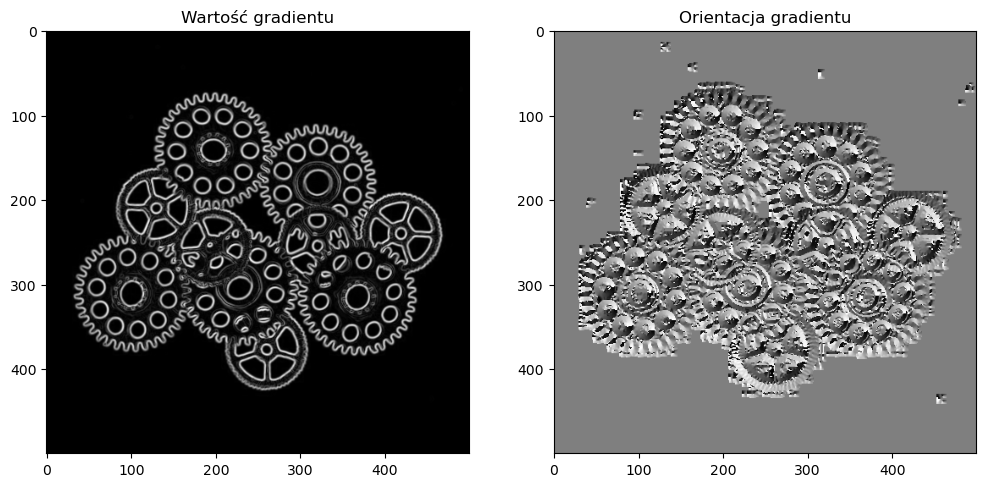

In [4]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.gray()
plt.imshow(grad_orientation_2)
plt.title('Orientacja gradientu')
plt.subplot(1, 2, 1)
plt.gray()
plt.imshow(grad_amplitude_norm_2)
plt.title('Wartość gradientu')


In [5]:
moments = cv2.moments(img_bin, 1)
mc = (moments['m10'] / moments['m00'], moments['m01']/ moments['m00'])
print(mc)

(72.21120501238525, 77.13237651172956)


In [6]:
Rtable = [[] for _ in range(360)]

# for i in range(len(contours)):
#     for j in range(len(contours[i])):
#         vec = (contours[i][j][0][0]-mc[0], contours[i][j][0][1]-mc[1])
#         vec_len = np.sqrt((contours[i][j][0][0]-mc[0])**2+(contours[i][j][0][1]-mc[1])**2)
#         vec_angle = np.rad2deg(np.arctan2(vec[1], vec[0]))

for xys in contours:
    for xy in xys:
        dist = distance.euclidean([mc[0], mc[1]], xy[0])
        angle = int(np.rad2deg(np.arctan2(mc[1] - xy[0, 1], mc[0] - xy[0, 0])))
        Rtable[int(np.rad2deg(grad_orientation[xy[0, 0]][xy[0, 1]]))].append((dist, angle))

print(Rtable[30])

[(68.91280615011107, 176), (37.15736058553638, -18), (41.68024309421181, 19)]


In [7]:
hough = np.zeros(img_bgr_2.shape)

for x in range(grad_amplitude_norm_2.shape[0]):
    for y in range(grad_amplitude_norm_2.shape[0]):
        if grad_amplitude_norm_2[x, y] > 0.5:
            for one in Rtable[int(np.rad2deg(grad_orientation_2[x][y]))]:
                r = one[0]
                fi = one[1]
                x1 = r * np.cos(np.deg2rad(fi)) + x
                y1 = r * np.sin(np.deg2rad(fi)) + y
                if x1 < hough.shape[0] and y1 < hough.shape[1]:
                    hough[int(x1)][int(y1)] += 1

max_hough = np.where(hough.max() == hough)
print(max_hough)

(array([303, 303, 303]), array([103, 103, 103]), array([0, 1, 2]))


In [8]:
# print(max_hough[1][0])

In [9]:
# cv2.circle (img_bgr_2,(int(max_hough[1][0]), int(max_hough[0][0])), 2,(0,0,255) )
# plt.imshow(img_bgr_2)
# plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


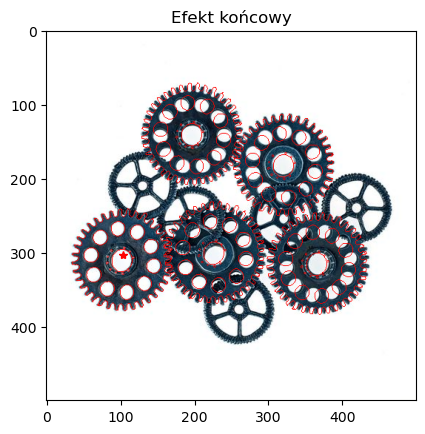

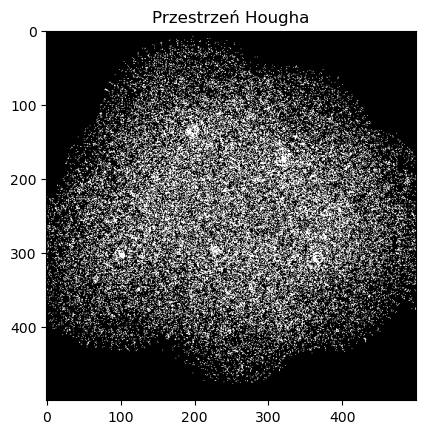

In [10]:
img = img_bgr_2.copy()
# print(max_hough[1][0])
for i in range(len(contours)):
    cv2.drawContours(img, contours, i, color=(255,0,0), offset=(int(max_hough[0][0]*0.09), int(max_hough[1][0]*2.25))) # y, x
    cv2.drawContours(img, contours, i, color=(255,0,0), offset=(int(max_hough[0][1]*0.5), int(max_hough[1][1]*2.15)))
    cv2.drawContours(img, contours, i, color=(255,0,0), offset=(int(max_hough[0][2]*0.81), int(max_hough[1][2])))
    cv2.drawContours(img, contours, i, color=(255,0,0), offset=(int(max_hough[0][2]*0.96), int(max_hough[1][2]*2.3)))
    cv2.drawContours(img, contours, i, color=(255,0,0), offset=(int(max_hough[0][2]*0.4), int(max_hough[1][2]*0.6)))


plt.figure()
plt.imshow(img)
plt.plot(max_hough[1][0], max_hough[0][0], '*r')
plt.title('Efekt końcowy')

plt.figure()
plt.gray()
plt.imshow(hough*255/hough.max())
plt.title('Przestrzeń Hougha')

plt.show()